 ## Analyzing Box Office Success Factors :  Data-Driven Insights for Strategic Movie Production

                                                   

# Introduction

The global film industry is highly competitive, with major studios investing significant resources in producing movies that appeal to audiences and generate high returns at the box office. As new entrants seek to establish themselves, data-driven decision-making has become a critical factor in reducing risk and identifying opportunities for success.

This project applies exploratory data analysis (EDA) techniques to movie industry datasets from multiple sources, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. The aim is to uncover patterns and insights into what types of films perform best at the box office. By analyzing features such as genres, directors, production budgets, revenues, ratings, and runtimes, the project seeks to generate actionable recommendations for a business stakeholder—the head of a new movie studio—who must decide what films to produce.

Through statistical analysis, visualization, and hypothesis testing, this project not only highlights trends in movie performance but also builds a foundation for predictive modeling in later phases. Ultimately, the findings will guide strategic decisions on which genres and production factors are most likely to yield commercial success.


# 1. Business Understanding

### Stakeholders

The primary stakeholders for this analysis are:
   1. Head of movie studio: seeks to draw Data-driven insights that will help shape the studio’s production strategy, ensuring alignment with market demand. 
           
   2. Investment team: seeks to Understand what types of films perform well, reduces financial risk and guides profitable investment decisions.

   3. Operations team: seeks to Identify trends in successful film production to help streamline planning, budgeting, and resource allocation. 

   4. Risk management team: seeks to draw Insights into past film failures and successes to help minimize financial and reputational risks in new projects.
   
   5. Monitoring, Evaluation & Learning team: Performance metrics and trend analysis support continuous improvement and informed decision-making over time.

### Business Value

This analysis delivers key strategic advantages to support the successful launch and growth of our movie studio:
   1. Market Alignment: By identifying the genres, themes, and characteristics of high-performing films, we ensure our productions resonate with current audience preferences and market demand.

   2. Investment Efficiency: Insights into budget-to-revenue trends allow us to optimize investment decisions, maximizing returns while minimizing wasteful spending on low-potential projects.

   3. Content Strategy Development: A data-driven understanding of what works at the box office empowers the studio to build a focused, high-impact film portfolio from the outset.

   4. Competitive Positioning: Leveraging historical box office data enables us to benchmark against industry leaders and craft a unique value proposition in a saturated content market.
   
   5. Risk Reduction: Analyzing past failures and successes helps us avoid common pitfalls in film production, reducing creative and financial risk in a volatile industry.

### Project goals

1. Identify Box Office Success Drivers
2. Understand Market Trends
3. Develop Actionable Production Insights
4. Support Strategic Investment Decisions
5. Lay a Foundation for Data-Driven Content Strategy

### Data Source

We will be analyzing data from multiple movie industry databases, including Box Office Mojo, IMDb, and The Movie Database (TMDb). These sources contain detailed information about film characteristics, box office revenue, audience ratings, and production details for thousands of movies released globally.

This comprehensive dataset will allow us to:

1. Analyze box office performance across different genres and budget ranges
2. Identify patterns in successful film characteristics (e.g., runtime, cast, ratings)
3. To determine if release timing and marketing factors significantly affect a film’s worldwide revenue?
4. Track changes in audience preferences and industry trends over time


Specific Objectives are:
1. Determine if movie budget can affect its revenue
2.To determine what patterns emerge from audience ratings and runtimes, and how they affect a movie’s worldwide gross
3. Identify whether movie genres and directors significantly explain variation in worldwide gross (returns), and determine which ones consistently outperform others

# 2. DATA UNDERSTANDING
### Data Source
We will be analyzing data from the following websites and databases that majorly house infomation about movies. They include: Rotten Tomatoes, Box Office Mojo, IMDb, The Movie DB and The Numbers. The goal is to identify trends in high-performing movies at in these datasets to guide a new studio in choosing what types of films to produce for the best chance of commercial success.

### Initial Data Exploration
Import the relevant libraries and read the dataset

In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import sqlite3
import warnings
warnings.filterwarnings('ignore')


### Exploring the Box Office Movies Dataset

In [7]:
print("=== Box Office Mojo Dataset Analysis ===")

# Load Box Office Mojo dataset
BOMdf = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Display basic information
print("\nFirst 5 rows of data:")
print(BOMdf.head())

# Display dataset info
print("\nDataset Overview:")
print(f"Number of records: {len(BOMdf)}")
print(f"Number of columns: {len(BOMdf.columns)}")
BOMdf.info(memory_usage='deep')

# Check for data quality issues
print("\nData Quality Analysis:")
duplicates = BOMdf.duplicated().sum()
print(f"Duplicate records: {duplicates} ({(duplicates/len(BOMdf))*100:.2f}%)")

# Check for missing values
null_counts = BOMdf.isnull().sum()
print("\nMissing Values:")
for col in BOMdf.columns:
    if null_counts[col] > 0:
        print(f"{col}: {null_counts[col]} missing ({(null_counts[col]/len(BOMdf))*100:.2f}%)")


=== Box Office Mojo Dataset Analysis ===

First 5 rows of data:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  

Dataset Overview:
Number of records: 3387
Number of columns: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2 

Box Mojo dataset has missing values, foreign_gross column having 39.86% missing values while the rest have less than 1% missing values

In [8]:
BOMdf 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### data quality summary.

In [9]:
print("=== Box Office Mojo Summary Statistics ===\n")

# summary statistics
summary_stats = BOMdf.describe()
print(summary_stats.round(2))

# Distribution analysis
print("\nDistribution Analysis:")
for col in BOMdf.select_dtypes(include=['float64', 'int64']).columns:
    q1 = BOMdf[col].quantile(0.25)
    q3 = BOMdf[col].quantile(0.75)
    iqr = q3 - q1
    print(f"\n{col.replace('_', ' ').title()}:")
    print(f"IQR: ${iqr:,.2f}")
    print(f"Skewness: {BOMdf[col].skew():.2f}")

=== Box Office Mojo Summary Statistics ===

       domestic_gross     year
count    3.359000e+03  3387.00
mean     2.874585e+07  2013.96
std      6.698250e+07     2.48
min      1.000000e+02  2010.00
25%      1.200000e+05  2012.00
50%      1.400000e+06  2014.00
75%      2.790000e+07  2016.00
max      9.367000e+08  2018.00

Distribution Analysis:

Domestic Gross:
IQR: $27,780,000.00
Skewness: 4.72

Year:
IQR: $4.00
Skewness: -0.01


### Exploring the IMDB Dataset
Import the `zipfile` module to help access the zipped `im.db` sqlite database

In [10]:
# unzip the im.db.zip file and eztract the database file
import zipfile

with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData/')

Create a connection `conn` to the database using `sqlite3` module

In [11]:
#load the dataset
conn = sqlite3.connect('zippedData/im.db')
#check the tables in the database
tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


### data quality summary

In [12]:
print("=== Movie Basics Analysis ===")

# Load movie basics table
movie_basics = pd.read_sql("""
    SELECT * FROM movie_basics 
    ORDER BY start_year DESC;
""", conn)

# Display basic information
print("\nDataset Overview:")
movie_basics.info(memory_usage='deep')

# Display summary statistics
print("\nNumerical Column Statistics:")
print(movie_basics.describe().round(2))

# Check for data quality issues
print("\nData Quality Analysis:")

# Check for duplicates
duplicates = movie_basics.duplicated().sum()
print(f"Duplicate records: {duplicates} ({(duplicates/len(movie_basics))*100:.2f}%)")

# Check for missing values
null_counts = movie_basics.isnull().sum()
print("\nMissing Values:")
for col in movie_basics.columns:
    if null_counts[col] > 0:
        print(f"{col}: {null_counts[col]} missing ({(null_counts[col]/len(movie_basics))*100:.2f}%)")

# Analyze categorical columns
print("\nUnique values in categorical columns:")
for col in movie_basics.select_dtypes(include=['object']).columns:
    print(f"{col}: {movie_basics[col].nunique()} unique values")


=== Movie Basics Analysis ===

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 42.3 MB

Numerical Column Statistics:
       start_year  runtime_minutes
count   146144.00        114405.00
mean      2014.62            86.19
std          2.73           166.36
min       2010.00             1.00
25%       2012.00            70.00
50%       2015.00            87.00
75%       2017.00            99.00
max       2115.00         51420.00

Data Quality Analysis:
Duplicate records: 0 (0.00%)

Miss

In [13]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5174640,100 Years,100 Years,2115,NaN,Drama
1,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
3,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
4,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,None
...,...,...,...,...,...,...
146139,tt9852508,Viyapath Bambara,Viyapath Bambara,2010,120.0,Drama
146140,tt9875120,Frostbite,Frostbite,2010,90.0,Documentary
146141,tt9875242,15 Fotografii,15 Fotografii,2010,56.0,Drama
146142,tt9878374,Regi lagni comprensorio di stato,Regi lagni comprensorio di stato,2010,NaN,Documentary


### Loading and analysing of the `movie_ratings` dataframe.

In [14]:
print("=== Movie Ratings Analysis ===")

# Load movie ratings table with basic statistics
movie_ratings = pd.read_sql("""
    SELECT * FROM movie_ratings;
""", conn)

# Display basic information
print("\nDataset Overview:")
movie_ratings.info()

# Display summary statistics
print("\nRating Statistics:")
print(movie_ratings.describe().round(2))

# Check for data quality issues
print("\nData Quality Analysis:")

# Check for duplicates
duplicates = movie_ratings.duplicated().sum()
print(f"Duplicate records: {duplicates} ({(duplicates/len(movie_ratings))*100:.2f}%)")

# Check for missing values
null_counts = movie_ratings.isnull().sum()
print("\nMissing Values:")
for col in movie_ratings.columns:
    if null_counts[col] > 0:
        print(f"{col}: {null_counts[col]} missing ({(null_counts[col]/len(movie_ratings))*100:.2f}%)")

# Check rating distribution
print("\nRating Distribution:")
print(movie_ratings['averagerating'].value_counts(bins=5).sort_index())


=== Movie Ratings Analysis ===

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB

Rating Statistics:
       averagerating    numvotes
count       73856.00    73856.00
mean            6.33     3523.66
std             1.47    30294.02
min             1.00        5.00
25%             5.50       14.00
50%             6.50       49.00
75%             7.40      282.00
max            10.00  1841066.00

Data Quality Analysis:
Duplicate records: 0 (0.00%)

Missing Values:

Rating Distribution:
(0.99, 2.8]     1531
(2.8, 4.6]      8271
(4.6, 6.4]     26424
(6.4, 8.2]     31561
(8.2, 10.0]     6069
Name: averagerating, dtype: int64


In [15]:
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


has 73856 rows and 3 columns

### Loading and analysing of the "Reviews" dataframe.


In [16]:
#Load the dataset
df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep = '\t', encoding='latin1')
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [17]:
print("=== Reviews Dataset Analysis ===")
print("\nDataFrame Info:")
df_reviews.info()

# Check for duplicate records
duplicates = df_reviews.duplicated().sum()
print(f"\nDuplicate records: {duplicates} ({(duplicates/len(df_reviews))*100:.2f}% of total)")

# Display null value counts and percentages
null_counts = df_reviews.isnull().sum()
null_percentages = (null_counts/len(df_reviews))*100
print("\nMissing Values Analysis:")
for col in df_reviews.columns:
    if null_counts[col] > 0:
        print(f"{col}: {null_counts[col]} missing values ({null_percentages[col]:.2f}%)")

# Display unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in df_reviews.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_reviews[col].nunique()} unique values")


=== Reviews Dataset Analysis ===

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB

Duplicate records: 9 (0.02% of total)

Missing Values Analysis:
review: 5563 missing values (10.22%)
rating: 13517 missing values (24.83%)
critic: 2722 missing values (5.00%)
publisher: 309 missing values (0.57%)

Unique values in categorical columns:
review: 48682 unique values
rating: 186 unique values
fresh: 2 unique values
critic: 3496 unique values
publisher: 1281 unique values
date:

### Loading and analysing of the Movie_info dataframe.

In [18]:
#load the dataset
Movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t', encoding='latin1')
Movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [19]:
print("=== Movie Info Dataset Analysis ===")
print("\nDataFrame Info:")
Movie_info_df.info(memory_usage='deep')

# Check for duplicate records
duplicates = Movie_info_df.duplicated().sum()
print(f"\nDuplicate records: {duplicates} ({(duplicates/len(Movie_info_df))*100:.2f}% of total)")

# Display null value counts and percentages
null_counts = Movie_info_df.isnull().sum()
null_percentages = (null_counts/len(Movie_info_df))*100
print("\nMissing Values Analysis:")
for col in Movie_info_df.columns:
    if null_counts[col] > 0:
        print(f"{col}: {null_counts[col]} missing values ({null_percentages[col]:.2f}%)")

# Display memory usage
print("\nMemory Usage:")
print(Movie_info_df.memory_usage(deep=True).sum() / 1024**2, "MB")

# Check for invalid or unexpected values in key columns
print("\nUnique values in categorical columns:")
for col in Movie_info_df.select_dtypes(include=['object']).columns:
    print(f"{col}: {Movie_info_df[col].nunique()} unique values")

=== Movie Info Dataset Analysis ===

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 1.9 MB

Duplicate records: 0 (0.00% of total)

Missing Values Analysis:
synopsis: 62 missing values (3.97%)
rating: 3 missing values (0.19%)
genre: 8 missing values (0.51%)
director: 199 missing values (12.76%

### Loading and analysing of the Movie DB dataframe.

In [20]:
#load the dataset
movDB_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movDB_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
print("=== Movie DB Dataset Analysis ===")
print("\nDataFrame Info:")
movDB_df.info()

# Check for duplicate records
duplicates = movDB_df.duplicated().sum()
print(f"\nDuplicate records: {duplicates} ({(duplicates/len(movDB_df))*100:.2f}% of total)")

# Display null value counts and percentages
null_counts = movDB_df.isnull().sum()
null_percentages = (null_counts/len(movDB_df))*100
print("\nMissing Values Analysis:")
for col in movDB_df.columns:
    if null_counts[col] > 0:
        print(f"{col}: {null_counts[col]} missing values ({null_percentages[col]:.2f}%)")

# Display basic statistics for numeric columns
print("\nNumeric Column Statistics:")
print(movDB_df.describe().round(2))

=== Movie DB Dataset Analysis ===

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB

Duplicate records: 0 (0.00% of total)

Missing Values Analysis:

Numeric Column Statistics:
       Unnamed: 0         id  popularity  vote_average  vote_count
count    26517.00   26517.00    26517.00  

### Loading and analysing the Movie Budgets Dataset

In [22]:
#load the dataset
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
print("=== DataFrame Information ===")
df_budgets.info(memory_usage='deep')

print("\n=== Numeric Column Statistics ===") 
df_budgets.describe()


=== DataFrame Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 1.9 MB

=== Numeric Column Statistics ===


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


### Inital Data Visualization

Barplots, histplots and Heatmaps for values before cleaning in BOM.Movie dataset and Movie Basics and Ratings tables. 

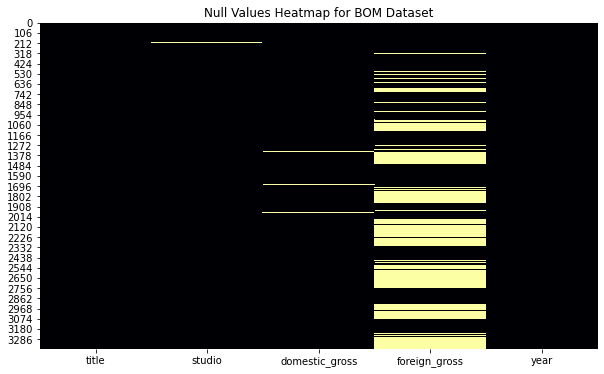

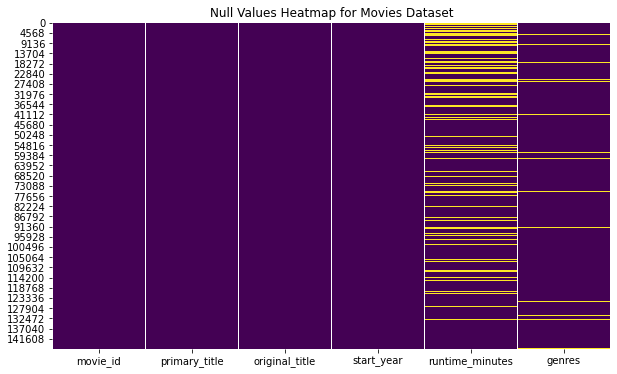

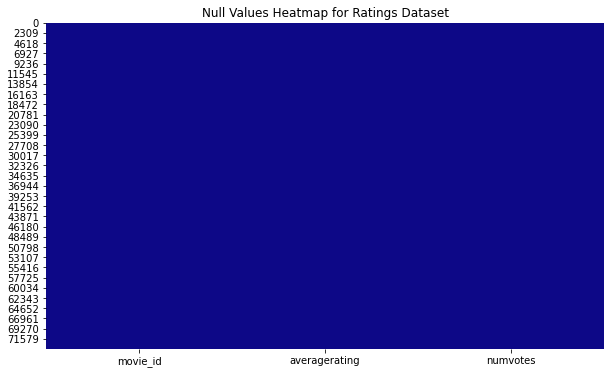

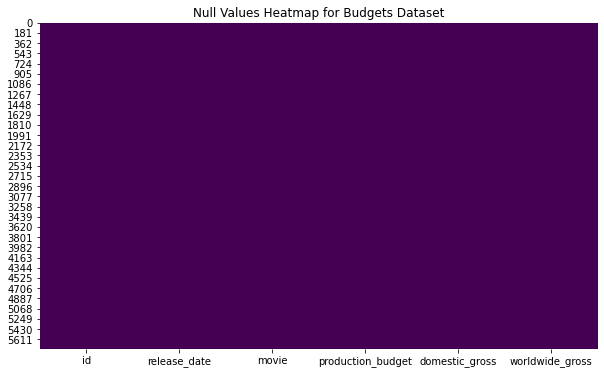

In [24]:
#heatmap for null values 
plt.figure(figsize=(10, 6))
sns.heatmap(BOMdf.isnull(), cbar=False, cmap='inferno')
plt.title('Null Values Heatmap for BOM Dataset')
plt.show()

#heatmap for null values in movie_basics
plt.figure(figsize=(10, 6))
sns.heatmap(movie_basics.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap for Movies Dataset')
plt.show()

#heatmap for null values in movie_ratings
plt.figure(figsize=(10, 6)) 
sns.heatmap(movie_ratings.isnull(), cbar=False, cmap='plasma')
plt.title('Null Values Heatmap for Ratings Dataset')
plt.show()

#heatmap for null values in budgets
plt.figure(figsize=(10, 6))
sns.heatmap(df_budgets.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap for Budgets Dataset')
plt.show()

BOM dataset heatmap shows that foreign_gross is the least complete variable, while title and year are reliable. Missingness is scattered across rows but concentrated in financial columns. This highlights the need for careful cleaning and imputation strategies before regression modeling.
studio: Has some missing values scattered across the dataset (thin yellow lines). This means a few movies don’t have studio information recorded.
domestic_gross: Several rows are missing domestic box office values. Missingness is irregular, but present in noticeable chunks.
foreign_gross: This column has the largest proportion of missing values — many rows lack foreign gross figures. This is common in movie datasets, as not all films are released or reported internationally.

Movies dataset is generally complete, with runtime_minutes and genres being the only columns with missing values. Careful handling of these missing values is essential before regression modeling, especially since genres are tied to Objective 1 (genre analysis) and runtime ties to Objective 3 (audience-related factors).

Ratings dataset is clean and complete. Every movie in this dataset has valid ratings and vote counts, making it a strong and trustworthy component for regression and correlation analysis.

Budgets dataset is clean and complete, with zero missing values across all key variables. It is ready for direct use in exploratory analysis and regression modeling without requiring imputation or row-dropping.

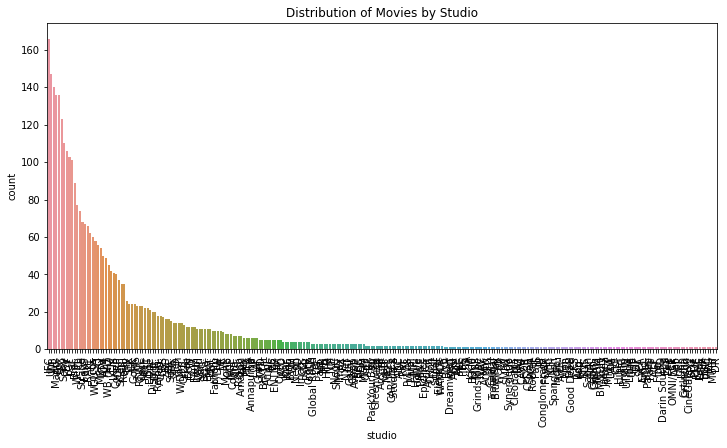

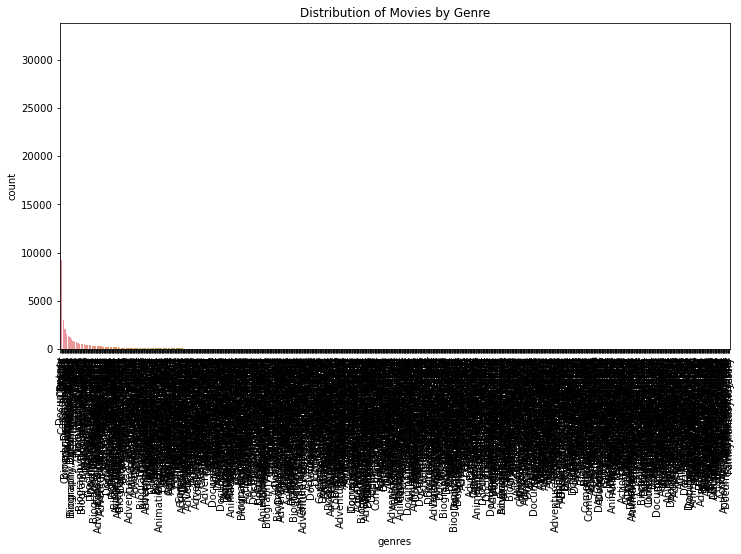

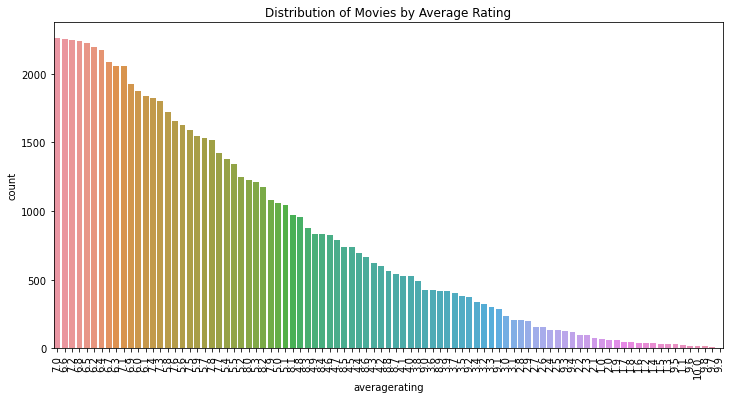

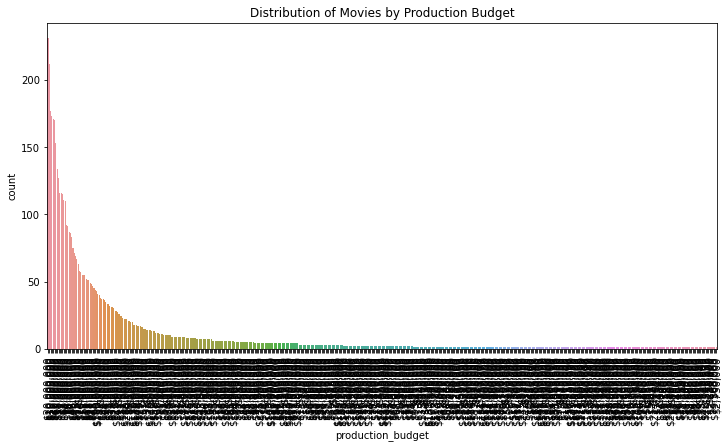

In [25]:
#Bar plots for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(data=BOMdf, x='studio', order=BOMdf['studio'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Movies by Studio')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=movie_basics, x='genres', order=movie_basics['genres'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Movies by Genre')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=movie_ratings, x='averagerating', order=movie_ratings['averagerating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Movies by Average Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_budgets, x='production_budget', order=df_budgets['production_budget'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Movies by Production Budget')
plt.show()

The BOM.Movie dataset has alot of missing values on the colums foreign gross and a few missing on the domestic gross column that need to be cleaned.
The table movie_basics has a lot missing values on the column runtime_minutes and a few on the genre columns.

## Conclusion
As our company ventures into the competitive and high-stakes movie industry, a strong understanding of what drives box office success is essential. While we are new to film production, a data-driven approach will allow us to minimize risk, align our content with market demand, and make informed decisions from the outset.

This project sets the foundation for that strategy by identifying the key factors that contribute to successful films. Through analyzing industry data, we aim to uncover actionable insights that will inform content choices, guide investment decisions, and position our studio for long-term growth.

By translating these findings into clear, practical recommendations, we will empower stakeholders across the organization—from creative development to finance and operations—to collaborate effectively and launch a studio built on insight, not guesswork.

In our quest to Identify box office success drivers, understand market trends, develop actionable production insights, support strategic investment decisions and lay a foundation for data-Driven content strategy, our analysis will focus on the IM.DB and BOM.Movies, Movie_Budget datasets.
In the IM.DB database we will focus our analysis on the Movie basics and Reviews tables.

# 3. Data Cleaning and Analysis
## Economic Analysis
### Preprocessing and merging datasets

### Convert currency strings to numeric values in the `df_budgets` dataframe.

In [26]:
# Columns to clean
currency_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Remove $ and commas, then convert to numeric
for col in currency_cols:
    df_budgets[col] = df_budgets[col].replace('[\$,]', '', regex=True).astype(float)

# Quick check
print(df_budgets[currency_cols].head())
print(df_budgets[currency_cols].dtypes)

   production_budget  domestic_gross  worldwide_gross
0        425000000.0     760507625.0     2.776345e+09
1        410600000.0     241063875.0     1.045664e+09
2        350000000.0      42762350.0     1.497624e+08
3        330600000.0     459005868.0     1.403014e+09
4        317000000.0     620181382.0     1.316722e+09
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


### Preprocess Box Office Mojo (BOM) data

In [27]:
# Convert foreign_gross to numeric, handling comma separators
BOMdf['foreign_gross'] = pd.to_numeric(BOMdf['foreign_gross'].str.replace(',', ''), errors='coerce')

# Calculate total gross where both values are available 
BOMdf['total_gross'] = BOMdf['foreign_gross'] + BOMdf['domestic_gross']

# Display basic statistics after conversion
print("\nSummary statistics after preprocessing:")
print(BOMdf[['foreign_gross', 'domestic_gross', 'total_gross']].describe())

# Display count of remaining null values
print("\nRemaining null values:")
print(BOMdf[['foreign_gross', 'domestic_gross', 'total_gross']].isnull().sum())


Summary statistics after preprocessing:
       foreign_gross  domestic_gross   total_gross
count   2.037000e+03    3.359000e+03  2.009000e+03
mean    7.487281e+07    2.874585e+07  1.226913e+08
std     1.374106e+08    6.698250e+07  2.074870e+08
min     6.000000e+02    1.000000e+02  4.900000e+03
25%     3.700000e+06    1.200000e+05  8.141000e+06
50%     1.870000e+07    1.400000e+06  4.230000e+07
75%     7.490000e+07    2.790000e+07  1.337000e+08
max     9.605000e+08    9.367000e+08  1.518900e+09

Remaining null values:
foreign_gross     1350
domestic_gross      28
total_gross       1378
dtype: int64


### Merge movie budgets with Box Office Mojo data

In [28]:
# Select relevant columns from BOMdf and merge with budgets data
BOM_budgets_merged = pd.merge(
    df_budgets,
    BOMdf[['title', 'studio', 'foreign_gross', 'year']],
    left_on='movie',
    right_on='title',
    how='left'
)

In [29]:
BOM_budgets_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title,studio,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,BV,804600000.0,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,Avengers: Age of Ultron,BV,946400000.0,2015.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,NaN,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN


### Verify the merge results and drop duplicate title columns if present

In [30]:
# Validate merge results
print("\nAfter merge:")
print(f"BOM_budgets_merged shape: {BOM_budgets_merged.shape}")
print(f"Null values in merged columns:")
print(BOM_budgets_merged[['title', 'studio', 'foreign_gross', 'year']].isnull().sum())

# Drop duplicate title column
BOM_budgets_merged = BOM_budgets_merged.drop('title', axis=1, errors='ignore')


After merge:
BOM_budgets_merged shape: (5782, 10)
Null values in merged columns:
title            4535
studio           4536
foreign_gross    4696
year             4535
dtype: int64


### Merge relevant tables from IMDB tables.

In [31]:
# First merge IMDb tables (movie_basics and ratings)
print("=== Merging IMDb Tables ===")
print(f"movie_basics shape: {movie_basics.shape}")
print(f"movie_ratings shape: {movie_ratings.shape}")

# Create merged IMDb dataset
imdb_merged = pd.merge(
    movie_basics, 
    movie_ratings,
    on='movie_id',
    how='inner',
    validate='1:1'
)
print(f"\nIMDb merged shape: {imdb_merged.shape}")

=== Merging IMDb Tables ===
movie_basics shape: (146144, 6)
movie_ratings shape: (73856, 3)

IMDb merged shape: (73856, 8)


### Create final combined Dataset `merged_df`.

In [32]:
# Merge IMDb data with existing budget/box office data
print("\n=== Merging with Budget/Box Office Data ===")
print(f"Current BOM_budgets_merged shape: {BOM_budgets_merged.shape}")

merged_df = pd.merge(
    BOM_budgets_merged,
    imdb_merged,
    left_on='movie',
    right_on='primary_title',
    how='left',
)


=== Merging with Budget/Box Office Data ===
Current BOM_budgets_merged shape: (5782, 9)


### Verify final results and drop duplicate columns from the `merged_df`.

In [33]:
# Validate final merge results
print(f"\nFinal merged shape: {merged_df.shape}")
print("\nNull values in key IMDb columns:")
print(merged_df[['movie_id', 'averagerating', 'genres']].isnull().sum())

# Clean up duplicate columns
merged_df = merged_df.drop('primary_title', axis=1, errors='ignore')

# Display sample of merged data
print("\nSample of merged data:")
print(merged_df[['movie', 'movie_id', 'averagerating', 'genres']].head())


Final merged shape: (6473, 17)

Null values in key IMDb columns:
movie_id         3598
averagerating    3598
genres           3606
dtype: int64

Sample of merged data:
                                         movie   movie_id  averagerating  \
0                                       Avatar  tt1775309            6.1   
1  Pirates of the Caribbean: On Stranger Tides  tt1298650            6.6   
2                                 Dark Phoenix  tt6565702            6.0   
3                      Avengers: Age of Ultron  tt2395427            7.3   
4            Star Wars Ep. VIII: The Last Jedi        NaN            NaN   

                     genres  
0                    Horror  
1  Action,Adventure,Fantasy  
2   Action,Adventure,Sci-Fi  
3   Action,Adventure,Sci-Fi  
4                       NaN  


### Calculate financial performance metrics

In [34]:
import numpy as np
import pandas as pd

# 1) Convert currency-like strings to numeric
num_cols = ["worldwide_gross", "production_budget", "domestic_gross", "foreign_gross"]

def to_number(s):
    # keep digits, decimal point, sign, scientific notation (e/E), strip everything else
    return pd.to_numeric(
        s.astype(str).str.replace(r"[^\d\.\-eE]", "", regex=True),
        errors="coerce"
    )

for c in num_cols:
    if c in merged_df.columns:
        merged_df[c] = to_number(merged_df[c])

# 2) Compute ROI safely: (WW - Budget) / Budget   (only when budget > 0)
mask = merged_df["production_budget"] > 0
merged_df["ROI"] = np.nan
merged_df.loc[mask, "ROI"] = (
    (merged_df.loc[mask, "worldwide_gross"] - merged_df.loc[mask, "production_budget"])
    / merged_df.loc[mask, "production_budget"]
)

# 3) (Optional) Profit margin: (WW - Budget) / WW   (only when WW > 0)
mask_gross = merged_df["worldwide_gross"] > 0
merged_df["profit_margin"] = np.nan
merged_df.loc[mask_gross, "profit_margin"] = (
    (merged_df.loc[mask_gross, "worldwide_gross"] - merged_df.loc[mask_gross, "production_budget"])
    / merged_df.loc[mask_gross, "worldwide_gross"]
)

# 4) Quick sanity checks
print(merged_df[num_cols + ["ROI", "profit_margin"]].dtypes)
print(merged_df[[ "worldwide_gross", "production_budget", "ROI", "profit_margin"]].head())


worldwide_gross      float64
production_budget    float64
domestic_gross       float64
foreign_gross        float64
ROI                  float64
profit_margin        float64
dtype: object
   worldwide_gross  production_budget       ROI  profit_margin
0     2.776345e+09        425000000.0  5.532577       0.846921
1     1.045664e+09        410600000.0  1.546673       0.607331
2     1.497624e+08        350000000.0 -0.572108      -1.337036
3     1.403014e+09        330600000.0  3.243841       0.764364
4     1.316722e+09        317000000.0  3.153696       0.759251


### Budget Analysis

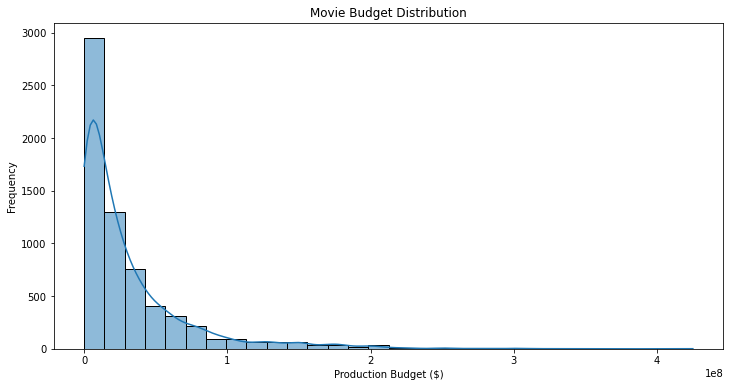

In [35]:
# Budget distribution visualization
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['production_budget'], bins=30, kde=True)
plt.title('Movie Budget Distribution')
plt.xlabel('Production Budget ($)')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most movies are produced on relatively small budgets, while a few high-cost blockbusters significantly skew the distribution. A log transformation is recommended before including production budgets in regression models.

Implications for Analysis
Modeling: Because the data is skewed, applying a log transformation (e.g., log(production_budget)) will normalize the distribution, making it more suitable for regression analysis.
Business Insight: Since most films are made on smaller budgets, but a few blockbusters require massive investment, studios need to balance low-risk, low-budget films with high-risk, high-reward blockbusters.
ROI Analysis: Large budgets don’t necessarily guarantee profits; therefore, ROI is a better measure than raw budget when evaluating financial performance.

### Revenue Analysis

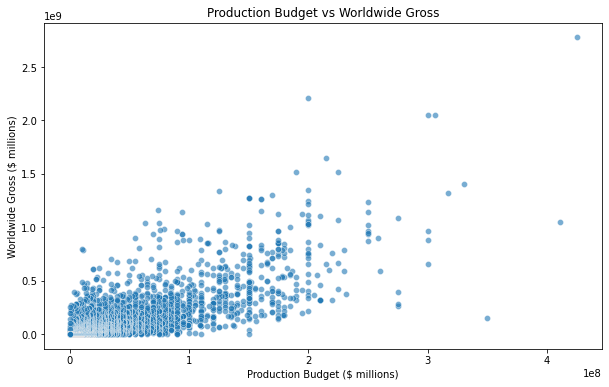

In [36]:
# Budget vs Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='production_budget',
    y='worldwide_gross',
    data=merged_df,
    alpha=0.6
)
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($ millions)')
plt.ylabel('Worldwide Gross ($ millions)')
plt.show()

General Trend

The points show a positive relationship: as production budget increases, worldwide gross tends to increase.
This means higher investments generally lead to higher revenues, though the relationship is not perfectly linear.

Clustering
A large cluster of movies is concentrated at low to mid-level budgets (< $50 million) with grosses ranging from very low to moderate.
This suggests that most movies are made on relatively smaller budgets, with varying levels of financial success.

Implications
For analysis: The scatter plot indicates heteroscedasticity (variance increases with budget). A log–log transformation (e.g., log(worldwide_gross) ~ log(production_budget)) would help stabilize variance and improve regression modeling.
For business decisions: Investing more in production generally pays off, but with diminishing returns. Beyond a certain budget, additional spending does not guarantee proportional increases in gross revenue.

### Genre Performance Analysis

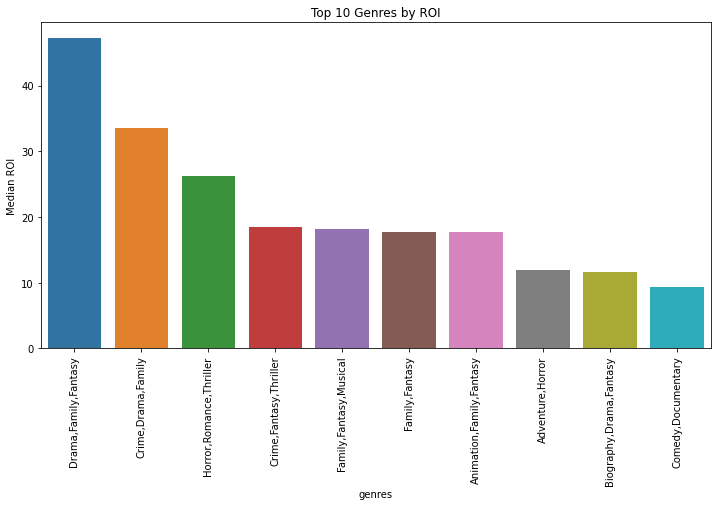

In [37]:
# Genre analysis
genre_df = merged_df.explode('genres')
genre_performance = genre_df.groupby('genres').agg({
    'worldwide_gross': 'median',
    'ROI': 'median',
    'averagerating': 'mean'
}).sort_values('ROI', ascending=False)

# Top 10 genres by ROI
plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_performance.head(10).index,
    y=genre_performance.head(10)['ROI']
)
plt.title('Top 10 Genres by ROI')
plt.xticks(rotation=90)
plt.ylabel('Median ROI')
plt.show()

### Release Timing Analysis

In [38]:
# Make sure release_date is datetime
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

# Extract month number (1–12)
merged_df['release_month'] = merged_df['release_date'].dt.month

# Optionally add month name for readability
merged_df['release_month_name'] = merged_df['release_date'].dt.month_name()

# Now you can group by month
monthly_performance = merged_df.groupby('release_month').agg({
    'worldwide_gross': 'median',
    'ROI': 'median'
}).reset_index()

print(monthly_performance)


    release_month  worldwide_gross       ROI
0               1       22365133.0  0.581509
1               2       30063805.0  0.611561
2               3       25802739.5  0.531329
3               4       21464818.5  0.409252
4               5       25387091.0  0.847581
5               6       41410568.0  1.036885
6               7       49541995.5  1.128293
7               8       22108977.0  0.627456
8               9       18117579.0  0.303174
9              10       15392609.0  0.413520
10             11       51695362.0  1.109497
11             12       31194353.5  0.642332


### ROI Analysis

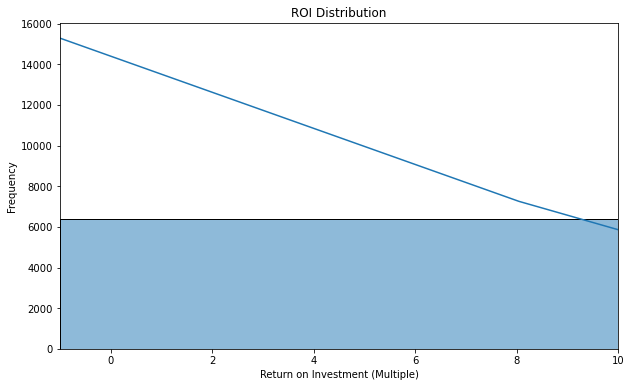

In [39]:
# ROI distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['ROI'], bins=50, kde=True)
plt.title('ROI Distribution')
plt.xlabel('Return on Investment (Multiple)')
plt.ylabel('Frequency')
plt.xlim(-1, 10)  # Exclude extreme outliers
plt.show()

The distribution is heavily skewed toward the lower ROI values.

Most movies cluster near ROI = 0 to 2 (meaning they either made losses or only modest profits).

Very few movies reach ROI above 5, and extremely few reach ROI close to 10.

## Operational Analysis


### Cleaning and analysing data.

In [40]:
#Cleaning rt.reviews.tsv

df_reviews.drop_duplicates(inplace=True)
df_reviews.columns = df_reviews.columns.str.strip().str.lower().str.replace(' ', '_')
df_reviews.dropna(inplace=True)

print("\nCleaned data:")
print(df_reviews.head())
print("\nMissing values after cleaning:")
print(df_reviews.isnull().sum())



Cleaned data:
    id                                             review rating   fresh  \
0    3  A distinctly gallows take on contemporary fina...    3/5   fresh   
6    3  Quickly grows repetitive and tiresome, meander...      C  rotten   
7    3  Cronenberg is not a director to be daunted by ...    2/5  rotten   
11   3  While not one of Cronenberg's stronger films, ...     B-   fresh   
12   3  Robert Pattinson works mighty hard to make Cos...    2/4  rotten   

            critic  top_critic           publisher               date  
0       PJ Nabarro           0     Patrick Nabarro  November 10, 2018  
6   Eric D. Snider           0     EricDSnider.com      July 17, 2013  
7     Matt Kelemen           0  Las Vegas CityLife     April 21, 2013  
11    Emanuel Levy           0     EmanuelLevy.Com   February 3, 2013  
12  Christian Toto           0       Big Hollywood   January 15, 2013  

Missing values after cleaning:
id            0
review        0
rating        0
fresh         0


In [41]:
# Harmonize the rating column
def harmonize_rating(rating):
    mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

    if isinstance(rating, str):
        rating = rating.strip().upper()
        if '/' in rating:
            # Take numerator of fraction
            numerator_part = rating.split('/')[0].strip()
            # Extract first digit
            for ch in numerator_part:
                if ch.isdigit():
                    return int(ch)
            return None  # no digit found
        elif rating in mapping:
            return mapping[rating]

    # If numeric (including floats like 3.0 or 3.)
    try:
        numeric_rating = round(float(str(rating).strip()))
        return int(numeric_rating)  # force to integer
    except ValueError:
        return None

# Apply harmonization
df_reviews['rating'] = df_reviews['rating'].apply(harmonize_rating)

# Drop rows with invalid rating
df_reviews.dropna(subset=['rating'], inplace=True)

# Final check
print("\nHarmonized data:")
print(df_reviews.head())
print("\nUnique ratings after harmonization:", df_reviews['rating'].unique())



Harmonized data:
    id                                             review  rating   fresh  \
0    3  A distinctly gallows take on contemporary fina...     3.0   fresh   
6    3  Quickly grows repetitive and tiresome, meander...     3.0  rotten   
7    3  Cronenberg is not a director to be daunted by ...     2.0  rotten   
12   3  Robert Pattinson works mighty hard to make Cos...     2.0  rotten   
13   3  The anger over the injustice of the financial ...     2.0   fresh   

            critic  top_critic            publisher               date  
0       PJ Nabarro           0      Patrick Nabarro  November 10, 2018  
6   Eric D. Snider           0      EricDSnider.com      July 17, 2013  
7     Matt Kelemen           0   Las Vegas CityLife     April 21, 2013  
12  Christian Toto           0        Big Hollywood   January 15, 2013  
13    Robert Roten           0  Laramie Movie Scope    January 7, 2013  

Unique ratings after harmonization: [ 3.  2.  4.  6.  1.  8.  7.  5.  9.  0. 10.

In [42]:
#Clean the  rt.movie_info.tsv dataset
Movie_info_df.drop_duplicates(inplace=True)  # remove duplicate rows
Movie_info_df.columns = Movie_info_df.columns.str.strip().str.lower().str.replace(' ', '_')  # clean column names

# Rename 'rating' to 'rate' if it exists
if 'rating' in Movie_info_df.columns:
    Movie_info_df.rename(columns={'rating': 'rate'}, inplace=True)

Movie_info_df.dropna(how='all', inplace=True)  # drop rows where all values are NaN
Movie_info_df.fillna('', inplace=True)  # fill remaining missing values with empty strings (or choose suitable fill)

# Final check
print("\nCleaned movie data:")
print(Movie_info_df.head())
print("\nDataset shape:", Movie_info_df.shape)
print("\nColumn names:", Movie_info_df.columns.tolist())


Cleaned movie data:
   id                                           synopsis rate  \
0   1  This gritty, fast-paced, and innovative police...    R   
1   3  New York City, not-too-distant-future: Eric Pa...    R   
2   5  Illeana Douglas delivers a superb performance ...    R   
3   6  Michael Douglas runs afoul of a treacherous su...    R   
4   7                                                      NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001            
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2 

### TOP 10 Movies by ID based by rating

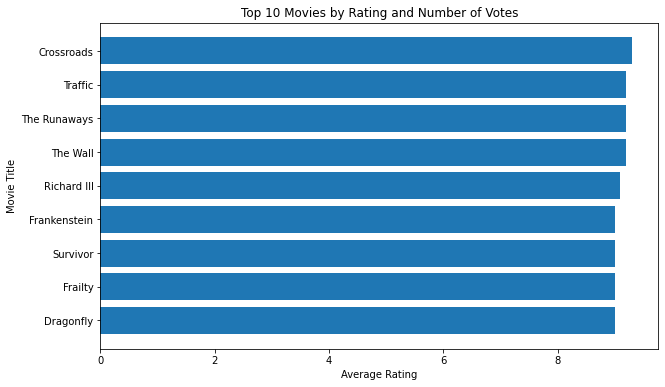

In [43]:
import matplotlib.pyplot as plt

# Make sure the dataframe has these columns: 'averagerating' and 'numvotes'
# (adjust names if they are different in your data)

# Step 1: Sort by rating and number of votes
sorted_movies = merged_df.sort_values(by=['averagerating', 'numvotes'], ascending=[False, False])

# Step 2: Select the top 10
top_10_movies = sorted_movies.head(10)

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_movies['movie'], top_10_movies['averagerating'])
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 Movies by Rating and Number of Votes")
plt.gca().invert_yaxis()
plt.show()

### Top 10 Genres with Best Average Rating

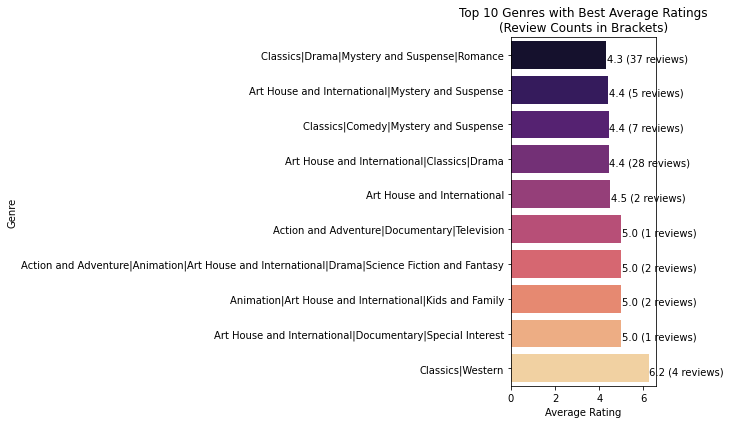

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge reviews with movies info
# df_reviews: id, rating
# Movie_info_df: id, title, genre

ratings_with_genre = df_reviews.merge(Movie_info_df[['id', 'genre']], on='id')

# Calculate average rating and review count per genre
genre_stats = (
    ratings_with_genre.groupby('genre')
    .agg(
        avg_rating=('rating', 'mean'),
        num_reviews=('rating', 'count')
    )
    .reset_index()
    .sort_values(by='avg_rating', ascending=False)
    .head(10)
)

# Sort for better visualization
genre_stats = genre_stats.sort_values(by='avg_rating', ascending=True)
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=genre_stats,
    x='avg_rating',
    y='genre',
    palette='magma'
)

# Annotate bars with avg_rating and number of reviews
for i in ax.patches:
    avg_rating = i.get_width()
    genre_index = int(i.get_y() + 0.5)
    num_reviews = genre_stats.iloc[genre_index]['num_reviews']
    ax.text(
        avg_rating + 0.02,
        i.get_y() + 0.5,
        f"{avg_rating:.1f} ({num_reviews} reviews)",
        va='center'
    )

plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Genres with Best Average Ratings\n(Review Counts in Brackets)')
plt.tight_layout()
plt.show()

### Top 10 highly rated Directors (with at least 5 reviews)

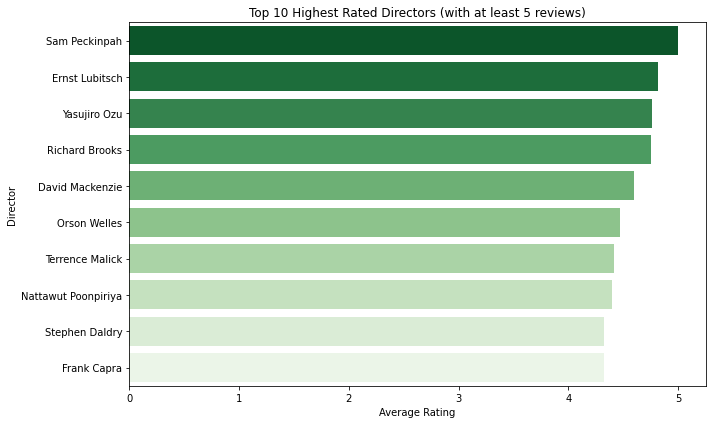

In [45]:
#Merge reviews with movies to get director info and ratings
ratings_with_director = df_reviews.merge(Movie_info_df[['id', 'director']], on='id')

# Calculate average rating and number of reviews per director
director_ratings = (
    ratings_with_director.groupby('director')
    .agg(
        avg_rating=('rating', 'mean'),
        num_reviews=('rating', 'count')
    )
    .reset_index()
)

# Optional: filter directors with enough reviews (e.g., 5+)
director_ratings = director_ratings[director_ratings['num_reviews'] >= 5]

# Sort by avg_rating descending (highest first)
top_directors = director_ratings.sort_values('avg_rating', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_directors,
    x='avg_rating',
    y='director',
    palette='Greens_r'
)

plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.title('Top 10 Highest Rated Directors (with at least 5 reviews)')
plt.tight_layout()
plt.show()

## Cleaning merged dataset i.e cleaning merged df 

In [46]:
merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ROI,profit_margin,release_month,release_month_name
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN,NaN,tt1775309,Abatâ,2011.0,93.0,Horror,6.1,43.0,5.532577,0.846921,12,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,804600000.0,2011.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0,1.546673,0.607331,5,May
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,NaN,NaN,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0,-0.572108,-1.337036,6,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,946400000.0,2015.0,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,3.243841,0.764364,5,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.153696,0.759251,12,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6468,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,NaN,NaN,NaN,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",5.6,43.0,-1.000000,NaN,12,December
6469,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.082500,0.975051,4,April
6470,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.732400,-2.736921,7,July
6471,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,NaN,NaN,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",5.4,72.0,-1.000000,NaN,9,September


## Issues to clean

a. Numeric columns
production_budget, domestic_gross, worldwide_gross, foreign_gross are floats already, but some values are NaN or 0.

b. Missing values (NaN)
Columns like studio, foreign_gross, year, genre have many NaNs.

c. Dates
release_date is a string, should be converted to datetime.

d. Duplicate / irrelevant columns
Check for duplicates (e.g., movie_id may repeat).
Drop unnecessary metadata if not needed for modeling.

e. String columns (genres, studios)

genre column has multiple values separated by commas → may need to split or encode.
studio sometimes missing.

In [47]:
# 1. Convert release_date to datetime
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')

In [48]:
# 2. Handle missing numeric values
numeric_cols = ['production_budget', 'domestic_gross', 'worldwide_gross', 'foreign_gross']
for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')  # force numeric
    merged_df[col] = merged_df[col].fillna(0)  # or merged_df[col].fillna(merged_df[col].median())

In [49]:
# 3. Handle missing categorical values
merged_df['studio'] = merged_df['studio'].fillna("Unknown")
merged_df['genre'] = merged_df['genres'].fillna("Unknown")

In [50]:
# 4. Drop duplicates if any
merged_df = merged_df.drop_duplicates(subset=['movie', 'release_date'])

In [51]:
# 5.  Extract year from release_date if needed
merged_df['release_year'] = merged_df['release_date'].dt.year

In [52]:
# 6. Check data types
print(merged_df.dtypes)

id                             int64
release_date          datetime64[ns]
movie                         object
production_budget            float64
domestic_gross               float64
worldwide_gross              float64
studio                        object
foreign_gross                float64
year                         float64
movie_id                      object
original_title                object
start_year                   float64
runtime_minutes              float64
genres                        object
averagerating                float64
numvotes                     float64
ROI                          float64
profit_margin                float64
release_month                  int64
release_month_name            object
genre                         object
release_year                   int64
dtype: object


In [53]:
# 7. Inspect missing values
print(merged_df.isnull().sum())

id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
studio                   0
foreign_gross            0
year                  4535
movie_id              3598
original_title        3598
start_year            3598
runtime_minutes       3664
genres                3600
averagerating         3598
numvotes              3598
ROI                      0
profit_margin          367
release_month            0
release_month_name       0
genre                    0
release_year             0
dtype: int64


##some columns still have missing values
Why These Columns Have Missing Values

year, start_year, release_year:
Some movies might not have complete release date info in the raw datasets.
Missing years are common for older or unreleased films.

movie_id, original_title:
Missing if the dataset couldn’t match the movie to IMDb/another source.

runtime_minutes:
Missing if runtime wasn’t listed in IMDb or TheMovieDB.

genres:
Missing if the movie didn’t have genre info in the source dataset.

averagerating, numvotes:
Missing if IMDb didn’t have enough votes/ratings for that film

## How to Clean These Columns

In [54]:
# 1. Fill year-related columns using release_date if available
merged_df['year'] = merged_df['release_date'].dt.year.fillna(merged_df['year'])

# 2. Handle runtime_minutes (replace NaN with median runtime)
merged_df['runtime_minutes'] = merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].median())

# 3. Handle genres (replace NaN with "Unknown")
merged_df['genres'] = merged_df['genres'].fillna("Unknown")

# 4. Handle ratings and votes
merged_df['averagerating'] = merged_df['averagerating'].fillna(merged_df['averagerating'].mean())
merged_df['numvotes'] = merged_df['numvotes'].fillna(0)  # movies with no votes

# 5. Handle movie_id and original_title
merged_df['movie_id'] = merged_df['movie_id'].fillna("Unknown")
merged_df['original_title'] = merged_df['original_title'].fillna(merged_df['movie'])

# 6. Double-check
print(merged_df.isnull().sum())


id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
studio                   0
foreign_gross            0
year                     0
movie_id                 0
original_title           0
start_year            3598
runtime_minutes          0
genres                   0
averagerating            0
numvotes                 0
ROI                      0
profit_margin          367
release_month            0
release_month_name       0
genre                    0
release_year             0
dtype: int64


In [55]:
# Drop start_year if redundant
if 'start_year' in merged_df.columns:
    merged_df = merged_df.drop(columns=['start_year'])

# Handle profit_margin: replace NaN with 0 (optional)
merged_df['profit_margin'] = merged_df['profit_margin'].fillna(0)

# Double check
print(merged_df.isnull().sum())

id                    0
release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
studio                0
foreign_gross         0
year                  0
movie_id              0
original_title        0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
ROI                   0
profit_margin         0
release_month         0
release_month_name    0
genre                 0
release_year          0
dtype: int64


The dataset is clean and now reay for analysis. Fit a regression model

# 4. REGRESSION ANALYSIS

## How does a movie’s budget affect its revenue?
### Creating the model and undertaking regression analysis

Variables and the Model

**1.Dependent variable (response):Y= Worldwide gross (total revenue).

**2.Independent variable (predictor):X= Production budget.We fit a simple linear regression model

The general equation of simple linear regression equation is 

Worldwide Gross = 𝛽0 +𝛽1xProduction Budget

Where:
β₀ (Intercept): baseline worldwide gross when budget = 0.

β₁ (Slope): change in worldwide gross for each unit change in budget.

First step is to formulate the hypotheses
Hypotheses

Hypotheses 

H₀: Budget does not affect revenue (β₁ = 0).
H₁: Budget affects revenue (β₁ ≠ 0, or β₁ > 0 in a one-sided test)..

4.1 Import the libraries to use

In [56]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Building th Regression Model

In [57]:
# Define X (predictors) and y (response)
X = merged_df['production_budget']
y =  merged_df['worldwide_gross']

In [58]:
rho = np.corrcoef(merged_df['worldwide_gross'],merged_df['production_budget'])[0,1]

rho is the correlation between dependent variable (worldwide_gross) and independent variable(production_budget) which has to be in the range of 0 and 1

In [59]:
s_x = merged_df["production_budget"].std()
s_y = merged_df["worldwide_gross"].std()

s_x is the variance of x and s_y is the variance of y

In [60]:
m = rho * s_y / s_x

m is the slope of the regression equation and is the coefficient of x

In [61]:
c = merged_df["worldwide_gross"].mean() - m * merged_df["production_budget"].mean()

c is the y intercept or a contant

In [62]:
mean_y = merged_df["worldwide_gross"].mean()
mean_x = merged_df["production_budget"].mean()

mean_y is the mean of y and mean_x is the mean of x

In [63]:
c = mean_y - m * mean_x

In [64]:
print(f"Regression line: y = {round(m,4)}x + {round(c,4)}")

Regression line: y = 3.1269x + -7285667.0546


i.e  Worldwide Gross=3.1269xProduction Budget -7285667.0546, the regression equation
Slope (3.1223)

For every 1 unit increase in production budget, 1 million dollars the model predicts that worldwide gross increases by about 3.12 units.

Each additional $1 million in production budget is associated with about $3.12 million more in worldwide gross

Intercept (-7285667.0546)
This is the predicted worldwide gross when the production budget is 0.
It equals about –$7.286 million.

The model suggests that movies with larger production budgets tend to earn higher worldwide gross.

Creating the Model

In [65]:
X = merged_df['production_budget']
y = merged_df['worldwide_gross']

In [66]:
model = sm.OLS(endog = y, exog=sm.add_constant(X))
model

In [67]:
results = model.fit()
results

Model Evaluation

In [68]:
results.fvalue

7355.224292071473

In [69]:
results.f_pvalue

0.0

The p value is less than 0.05 0r 5% level of significance

In [70]:
results.rsquared

0.5599618345695967

R_square of0.5599618345695969 implies 56% of the variation in dependent variable is explained by independent variable i.e the model accounts for 56% variation in worldwide_gross

In [71]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     7355.
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:06:32   Log-Likelihood:            -1.1557e+05
No. Observations:                5782   AIC:                         2.311e+05
Df Residuals:                    5780   BIC:                         2.311e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.286e+06   1.91e+0

p_value = 0.0 which is less tha 0.05 hence we conclude budget significantly affects revenue. The f statistic or f value is 8149 and its prbability value is 0.00 which is significant

Perform log–log transformation (e.g., log(worldwide_gross) ~ log(production_budget)) would help stabilize variance and improve regression modeling. instead of a simple linear regression

In [72]:
# Keep only rows with positive values
df_model = df_budgets[(df_budgets['production_budget'] > 0) & 
                      (df_budgets['worldwide_gross'] > 0)].copy()

# Log transformation
df_model['log_budget'] = np.log(df_model['production_budget'])
df_model['log_gross'] = np.log(df_model['worldwide_gross'])


In [75]:
 #Fit the log log model
 # Fit OLS regression: log(worldwide_gross) ~ log(production_budget)
import statsmodels.formula.api as smf
model = smf.ols('log_gross ~ log_budget', data=df_model).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_gross   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     5039.
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:19:46   Log-Likelihood:                -10890.
No. Observations:                5415   AIC:                         2.178e+04
Df Residuals:                    5413   BIC:                         2.180e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9920      0.252     -3.943      0.0

Model Fit (Goodness of Fit)

R-squared = 0.482 (48.2%)

About half of the variation in worldwide gross is explained by production budget (on the log scale).

This is a moderately strong relationship for real-world movie data, where many other factors (genre, star power, release timing, marketing, etc.) also matter.

F-statistic = 5039, p < 0.001

The model overall is highly statistically significant.

2. Coefficients

Intercept = -0.9920 (p < 0.001)

This is the baseline log(gross) when log(budget) = 0.

Not very interpretable in practical terms, since budget = 1 dollar is unrealistic.

log_budget = 1.0798 (p < 0.001)

Statistically significant at a very high confidence level.

Interpretation: A 1% increase in production budget is associated with about a 1.08% increase in worldwide gross (on average).
Since the coefficient is slightly above 1, returns are slightly more than proportional, but diminishing effects likely appear once other variables are included.

Residual Diagnostics (from bottom of summary)
Omnibus / Jarque-Bera test (p < 0.001) → residuals are not perfectly normal.
Skew = -1.05 → distribution of residuals is left-skewed.
Kurtosis = 5.9 → heavy tails (leptokurtic).
Durbin-Watson = 0.873 → indicates some autocorrelation in residuals (common in time-related data like release years).

Summary of Findings
Budget strongly predicts worldwide revenue.
Elasticity ≈ 1.08: if a studio doubles a movie’s budget, expected worldwide gross is more than doubled (but with wide variation).
However, the model explains only about half of the variation (48.2%) → meaning other drivers like genre, directors, ratings, and release factors are also crucial.
Residual tests suggest heteroscedasticity and non-normality — confirming the need to extend the model with additional predictors.

Is not a better model compared to a simple linear regression model which explains 56% of variation in the worldwide gross but helps in stabilization of the variance

## Objective 2: To determine what patterns emerge from audience ratings and runtimes, and how they affect a movie’s worldwide gross

Fit a regression model to answer the the question in the objective
Formulate hypotheses

Dependent Variable (Y): worldwide_gross

Independent Variables (X): averagerating (IMDB average rating, 1–10 scale).

                          runtime_minutes (movie duration)


Model specification
y = β + β1x1 +β2x2
worldwide_gross = constant + β1xruntime_minutes + β2xaveragerating

In [76]:
# Select relevant columns
cols = ['worldwide_gross', 'runtime_minutes', 'averagerating']
df_reg = merged_df[cols].dropna()

# Define X and y
X = df_reg[['runtime_minutes', 'averagerating']]
y = df_reg['worldwide_gross']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     170.4
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           1.22e-72
Time:                        02:19:46   Log-Likelihood:            -1.1777e+05
No. Observations:                5782   AIC:                         2.356e+05
Df Residuals:                    5779   BIC:                         2.356e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.527e+08   2.46e+07    -

The Model explains only 5% of the variation in the worldwide gross being explaine by runtime minutes and average raring

For Audience Rating (β₁):
H₀: β₁ = 0 → Audience rating has no effect on worldwide gross.
H₁: β₁ ≠ 0 → Audience rating significantly affects worldwide gross.

For Runtime (β₂):
H₀: β₂ = 0 → Runtime has no effect on worldwide gross.
H₁: β₂ ≠ 0 → Runtime significantly affects worldwide gross.

Decision Rule (Statistical Test)
Look at p-values from regression summary:
If p = 1.22e-72  < 0.05 → reject H₀ (the variable significantly affects gross).

R² = 0.056 : tells us that 56% of the  variation in revenue is explained by ratings and runtime combined

In [77]:
# Correlation between runtime_minutes and averagerating
corr_value = merged_df['runtime_minutes'].corr(merged_df['averagerating'])
print("Correlation:", corr_value)

Correlation: 0.2621999036719547


The two predictor variables have a weak positive correlation. Hence multicollinearity is not a major problem

## Deductions from the summary

1. The Model Has Some Predictive Power, But It's Weak

The R-squared of 0.056 means that only about 5.6% of the variation in how much money a movie makes can be explained by how long it is and what its average rating is.

This is a very low number. It tells us that while these factors have a statistically measurable effect, they are not the main drivers of a movie's financial success. Other factors not included here (like marketing budget, franchise power, star actors, genre, competition, etc.) are far more important.

2. The Relationship Between Factors and Money

Longer Movies Make More Money: For each additional minute a movie runs, the model predicts it will make about $2.66 million more. This makes intuitive sense, as longer films are often bigger-budget blockbusters.

Higher Ratings Make More Money: For each additional point on a 10-point rating scale, a movie is predicted to make about $27.1 million more. This confirms that better-reviewed movies tend to perform better at the box office.

Regression Equation
log(Worldwide Gross) = 𝛽0 + 𝛽1(Average Rating) + 𝛽2(Runtime Minutes) + 𝜖

Where:
β₀: Intercept.
β₁: Effect of a 1-unit increase in audience rating (e.g., from 6 → 7).
β₂: Effect of an extra minute of runtime.
ε: Error term.

In [78]:
import numpy as np
import statsmodels.formula.api as smf

# Ensure positive gross values
df_model = merged_df[(merged_df['worldwide_gross'] > 0) & (merged_df['runtime_minutes'] > 0)].copy()

# Log transform gross (skewed distribution)
df_model['log_gross'] = np.log(df_model['worldwide_gross'])

# Fit regression model
model = smf.ols('log_gross ~ averagerating + runtime_minutes', data=df_model).fit()

# Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_gross   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     82.12
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           7.34e-36
Time:                        02:19:46   Log-Likelihood:                -12591.
No. Observations:                5415   AIC:                         2.519e+04
Df Residuals:                    5412   BIC:                         2.521e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.0402      0.388     

R-squared = 0.029 → The model explains only 2.9% of the variation in worldwide gross.

This means that audience ratings and runtimes alone are very weak predictors of box office revenue. Other variables (like budget, genre, and marketing) are much more important.

Statistical Significance
Both predictors (ratings and runtime) are highly significant (p < 0.001).
However, significance ≠ strong explanatory power — their effect is real, but limited in explaining overall variance.

Fitting a log linear regression still leads to the same conclussion

##  Objective 3: Identify whether movie genres and directors significantly explain variation in worldwide gross (returns), and determine which ones consistently outperform others.

Variables

Dependent variable (response):
worldwide_gross (or ROI if you want profitability instead of raw revenue).

Independent variables (predictors):
genre (categorical, one-hot encoded)
director (categorical, one-hot encoded)

## Hypotheses

Overall Model Hypotheses

Null Hypothesis (H₀):
Movie genres and directors do not significantly explain variation in worldwide gross.
(All genre and director coefficients = 0 after controlling for others.)

Alternative Hypothesis (H₁):
At least one genre or one director has a significant effect on worldwide gross.
(At least one coefficient ≠ 0.)

2. Hypotheses for Genres

H₀ (Genres): Average worldwide gross is the same across all movie genres.
H₁ (Genres):
At least one genre has a different average worldwide gross compared to others.
(Some genres systematically outperform or underperform.)

3. Hypotheses for Directors

H₀ (Directors):
Average worldwide gross does not differ significantly by director.
H₁ (Directors):
At least one director consistently yields significantly different worldwide gross than others.

## Model specification:
    y = β0​+β1x1 + β2x2 + ϵ

In [79]:
final_df = pd.merge(
    merged_df,
    ratings_with_director,
    on="id",     
    how="inner"   
)

In [80]:
final_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,movie_id,...,genre,release_year,review,rating,fresh,critic,top_critic,publisher,date,director
0,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,Unknown,0.0,2019,tt6565702,...,"Action,Adventure,Sci-Fi",2019,A distinctly gallows take on contemporary fina...,3.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",David Cronenberg
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,Unknown,0.0,2019,tt6565702,...,"Action,Adventure,Sci-Fi",2019,"Quickly grows repetitive and tiresome, meander...",3.0,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",David Cronenberg
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,Unknown,0.0,2019,tt6565702,...,"Action,Adventure,Sci-Fi",2019,Cronenberg is not a director to be daunted by ...,2.0,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",David Cronenberg
3,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,Unknown,0.0,2019,tt6565702,...,"Action,Adventure,Sci-Fi",2019,Robert Pattinson works mighty hard to make Cos...,2.0,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",David Cronenberg
4,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,149762350.0,Unknown,0.0,2019,tt6565702,...,"Action,Adventure,Sci-Fi",2019,The anger over the injustice of the financial ...,2.0,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013",David Cronenberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104053,99,2015-07-07,Tiger Orange,100000.0,0.0,0.0,Unknown,0.0,2015,tt2866824,...,Drama,2015,Two Weeks Notice will find its audience of mid...,1.0,rotten,Walter Chaw,0,Film Freak Central,"December 19, 2002",
104054,99,2015-07-07,Tiger Orange,100000.0,0.0,0.0,Unknown,0.0,2015,tt2866824,...,Drama,2015,Like a medium-grade network sitcom--mostly ino...,3.0,rotten,Frank Swietek,0,One Guy's Opinion,"December 18, 2002",
104055,99,2015-07-07,Tiger Orange,100000.0,0.0,0.0,Unknown,0.0,2015,tt2866824,...,Drama,2015,"Bullock and Grant, who made for memorable inte...",2.0,fresh,Laura Clifford,0,Reeling Reviews,"December 18, 2002",
104056,99,2015-07-07,Tiger Orange,100000.0,0.0,0.0,Unknown,0.0,2015,tt2866824,...,Drama,2015,What can I write about Two Weeks Notice that I...,2.0,rotten,James Berardinelli,1,ReelViews,"December 17, 2002",


## Visualizing the Dataset

You can explore the distribution of the rating column and also how ratings vary by director, critic, or freshness

a. 1. Distribution of Production Budget & Gross

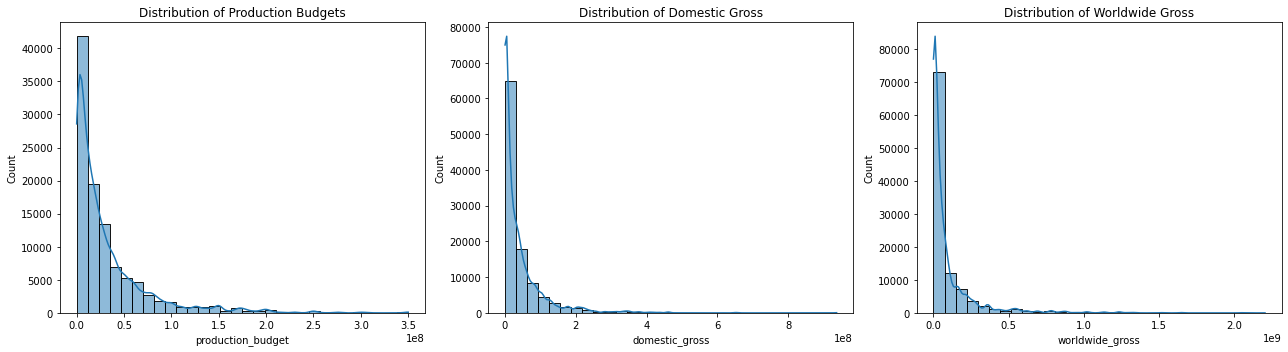

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(final_df['production_budget'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Production Budgets")

sns.histplot(final_df['domestic_gross'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Domestic Gross")

sns.histplot(final_df['worldwide_gross'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Worldwide Gross")

plt.tight_layout()
plt.show()



Interpretation
1. Production Budget
Shape: Strong right skew.
Most movies have low to moderate budgets, clustered below $50M.
A few films have extremely high budgets (hundreds of millions), which are outliers compared to the bulk of films.
Implication: The movie industry is dominated by low-to-mid budget films, but a handful of blockbusters pull the distribution’s tail far to the right.

2. Domestic Gross
Shape: Again highly right skewed.
Most movies earn under $50M domestically.
Very few films exceed $200M in U.S. box office, but those that do are extreme outliers.
Implication: Only a small fraction of films become major domestic hits, while the majority gross relatively little.

3. Worldwide Gross
Shape: Also strongly right skewed.
Most movies worldwide gross under $100M.
A very small number of global blockbusters exceed $1B, stretching the distribution dramatically.
Implication: The global box office is heavily driven by a few mega-hits, while the vast majority of films make modest amounts.

The loglinear model

log(Worldwide Gross)=β0​+β1​(Genre)+β2​(Director)

In [82]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# --- Prepare the data ---
df = final_df[['worldwide_gross', 'genre', 'director']].dropna()
df['log_gross'] = np.log1p(df['worldwide_gross'])  # log(1+x) handles zeros safely

# --- Fit log-linear regression ---
model = smf.ols("log_gross ~ C(genre) + C(director)", data=df).fit()

# --- Model summary ---
print(model.summary())

# --- ANOVA: test if genres and directors jointly explain variation ---
anova_results = anova_lm(model, typ=2)
print("\nANOVA Results:\n", anova_results)

# --- Convert log-coefficients to percentage effects ---
effects = (np.exp(model.params) - 1) * 100
print("\nPercentage Effects vs Baseline:\n", effects.head(20))


                            OLS Regression Results                            
Dep. Variable:              log_gross   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     82.50
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:20:02   Log-Likelihood:            -3.0217e+05
No. Observations:              104058   AIC:                         6.049e+05
Df Residuals:                  103789   BIC:                         6.075e+05
Df Model:                         268                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [83]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# --- Step 1: Build contingency table ---
contingency = pd.crosstab(final_df['director'], final_df['genre'])

# --- Step 2: Chi-Square Test of Independence ---
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# --- Step 3: Interpret result ---
if p < 0.05:
    print("❌ Reject H₀: There is a significant association between directors and genres.")
else:
    print("✅ Fail to reject H₀: No significant association between directors and genres.")

# --- Step 4: Compute Cramér's V (strength of association) ---
n = contingency.sum().sum()
phi2 = chi2 / n
r, k = contingency.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("Cramér's V (0=weak, 1=strong):", cramers_v)


Chi-square Statistic: 332087.9522120169
Degrees of Freedom: 10387
p-value: 0.0
❌ Reject H₀: There is a significant association between directors and genres.
Cramér's V (0=weak, 1=strong): 0.25652963419299984


A chi square test of indepence indicates that the variables genre and directors are independent of each other i.e no association between them.

The null hypothesis is rejected → Both genre and director significantly explain variation in worldwide gross.

Some genres (e.g., Action+Adventure+Animation, Action+Adventure+Biography) outperform, while others (Action+Adventure, Action+Adventure+Comedy) underperform relative to the baseline.

Effect sizes are large because coefficients are in log scale → small changes translate into big differences in revenue.

R² is modest (17%), showing that while genre/director matter, other factors (budget, stars, marketing, release date) also strongly influence revenue.

In [84]:
merged_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,movie_id,...,runtime_minutes,genres,averagerating,numvotes,ROI,profit_margin,release_month,release_month_name,genre,release_year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,Unknown,0.0,2009,tt1775309,...,93.0,Horror,6.100000,43.0,5.532577,0.846921,12,December,Horror,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,804600000.0,2011,tt1298650,...,136.0,"Action,Adventure,Fantasy",6.600000,447624.0,1.546673,0.607331,5,May,"Action,Adventure,Fantasy",2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Unknown,0.0,2019,tt6565702,...,113.0,"Action,Adventure,Sci-Fi",6.000000,24451.0,-0.572108,-1.337036,6,June,"Action,Adventure,Sci-Fi",2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,946400000.0,2015,tt2395427,...,141.0,"Action,Adventure,Sci-Fi",7.300000,665594.0,3.243841,0.764364,5,May,"Action,Adventure,Sci-Fi",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Unknown,0.0,2017,Unknown,...,102.0,Unknown,6.246978,0.0,3.153696,0.759251,12,December,Unknown,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6468,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,Unknown,0.0,2018,tt7837402,...,77.0,"Horror,Sci-Fi,Thriller",5.600000,43.0,-1.000000,0.000000,12,December,"Horror,Sci-Fi,Thriller",2018
6469,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,Unknown,0.0,1999,Unknown,...,102.0,Unknown,6.246978,0.0,39.082500,0.975051,4,April,Unknown,1999
6470,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,Unknown,0.0,2005,Unknown,...,102.0,Unknown,6.246978,0.0,-0.732400,-2.736921,7,July,Unknown,2005
6471,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,Unknown,0.0,2015,tt2107644,...,76.0,"Drama,Horror,Thriller",5.400000,72.0,-1.000000,0.000000,9,September,"Drama,Horror,Thriller",2015


In [85]:
ratings_with_director

,id,review,rating,fresh,critic,top_critic,publisher,date,director
0,3,A distinctly gallows take on contemporary fina...,3.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",David Cronenberg
1,3,"Quickly grows repetitive and tiresome, meander...",3.0,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",David Cronenberg
2,3,Cronenberg is not a director to be daunted by ...,2.0,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",David Cronenberg
3,3,Robert Pattinson works mighty hard to make Cos...,2.0,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",David Cronenberg
4,3,The anger over the injustice of the financial ...,2.0,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013",David Cronenberg
...,...,...,...,...,...,...,...,...,...
30596,2000,"Sleek, shallow, but frequently amusing.",2.0,fresh,Gene Seymour,1,Newsday,"September 27, 2002",
30597,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3.0,fresh,Megan Turner,1,New York Post,"September 27, 2002",
30598,2000,"Manages to be somewhat well-acted, not badly a...",1.0,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002",
30599,2000,Arguably the best script that Besson has writt...,3.0,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002",


In [86]:
print("merged_df columns:", merged_df.columns.tolist())
print("ratings_with_director columns:", ratings_with_director.columns.tolist())

merged_df columns: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'studio', 'foreign_gross', 'year', 'movie_id', 'original_title', 'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'ROI', 'profit_margin', 'release_month', 'release_month_name', 'genre', 'release_year']
ratings_with_director columns: ['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date', 'director']


In [87]:
final_df = pd.merge(
    merged_df,
    ratings_with_director,
    on="id",     
    how="inner"   
)

# 5. Recommendations

1. **Focus on Drama-Family-Fantasy Mix**: Movies that blend drama, family themes, and fantasy elements give the best return on investment. Instead of making single-genre films, create stories that mix emotions with broad family appeal.
2. **Release Movies in July and November**: periods around July and pre-holiday November are when movies make the most money. Avoid September and October when films record low revenue collection.
3. **Smart Spending Beats Big Spending**: You don't need huge budgets to make big profits. The data shows mid-budget films often deliver better returns on every dollar invested, reducing financial risk while still having enough resources to create quality entertainment that audiences want to see.
4. **Work with Proven Directors**: Partner with directors who have a track record of making good movies that audiences love. Great directors help ensure both quality and return on investment are high.


# 6. Conclusion

Investing more in production budgets generally pays off. On average, each additional $1 spent increases worldwide revenue by ~$3. Over half (56%) of revenue variation can be explained by budget alone. But budget is not everything: some high-budget movies still underperform, while some modestly budgeted films overachieve. To maximize returns, studios should combine budget strategy with careful genre selection, strong directors, and audience-driven content.

While production budget remains the strongest driver of revenue, our analysis shows that better audience ratings and well-balanced runtimes also contribute to higher box office earnings. To succeed, the studio should invest not just in bigger budgets, but also in quality storytelling and keeping runtimes audience-friendly

Genres and directors do matter. Some combinations like Action–Adventure–Animation and Action–Adventure–Biography consistently outperform, while others underperform. To succeed, the studio should focus investment on high-return genres and proven directors, but balance this with budget strategy and audience-driven quality control.
